In [59]:
import pandas as pd 
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline
df = pd.read_csv("mass_house.csv")
df = pd.DataFrame(data = df)

# Drop rows with NaN values
df = df.dropna()

print(df)


              blkgrp  households  area_median_income  \
0     '250010101001'       417.0             60424.0   
1     '250010101002'       187.0             60424.0   
2     '250010101003'       399.0             60424.0   
3     '250010101004'       429.0             60424.0   
4     '250010101005'       255.0             60424.0   
...              ...         ...                 ...   
4974  '250277614002'       375.0             65968.0   
4975  '250277614003'       358.0             65968.0   
4976  '250277614004'       268.0             65968.0   
4977  '250277614005'       455.0             65968.0   
4978  '250277614006'        67.0             65968.0   

      blkgrp_median_income_owners  blkgrp_median_income_renters  \
0                     74932.69613                   24079.96260   
1                     82419.52435                   26485.88889   
2                     61564.22056                   19783.94220   
3                     71165.47620                   22869.3

In [60]:
dropped = 'hh_type8_h_rent'
df = df.drop(dropped, axis=1)
df

,blkgrp,households,area_median_income,blkgrp_median_income_owners,blkgrp_median_income_renters,avg_hh_size_owners,avg_hh_size_renters,commuters_per_hh_owners,commuters_per_hh_renters,pct_renters,...,hh_type8_h_own,hh_type8_t_own,hh_type8_autos_own,hh_type8_vmt_own,hh_type8_transit_trips_own,hh_type8_ht_rent,hh_type8_t_rent,hh_type8_autos_rent,hh_type8_vmt_rent,hh_type8_transit_trips_rent
0,'250010101001',417.0,60424.0,74932.69613,24079.96260,1.66,1.53,1.12197,0.68060,0.24940,...,23.23580,17.20666,2.60,30815.64,0.46697,38.05702,14.88741,2.06,30815.64,0.00000
1,'250010101002',187.0,60424.0,82419.52435,26485.88889,2.07,1.90,1.17047,0.71002,0.21925,...,23.16960,16.54342,2.49,29811.24,9.33942,29.37019,14.64757,2.05,29811.24,0.00000
2,'250010101003',399.0,60424.0,61564.22056,19783.94220,1.42,1.28,0.58557,0.35521,0.48622,...,21.15716,15.05602,2.33,25667.28,27.08430,26.91138,13.03610,1.86,25667.28,24.74945
3,'250010101004',429.0,60424.0,71165.47620,22869.34935,1.91,1.28,0.97084,0.58892,0.20746,...,21.97802,15.06033,2.31,26120.88,28.95219,31.54475,13.34006,1.91,26120.88,25.21642
4,'250010101005',255.0,60424.0,40823.55192,13118.83402,1.56,1.12,0.85455,0.51838,0.33725,...,20.95856,14.74052,2.31,24510.60,22.88157,27.35705,12.46231,1.78,24510.60,19.61277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,'250277614002',375.0,65968.0,167892.76454,50610.90880,2.92,1.00,1.18837,0.89516,0.02400,...,25.27286,16.34201,2.66,32717.52,4.68839,28.48611,14.84313,2.28,32717.52,0.00000
4975,'250277614003',358.0,65968.0,160022.00645,48238.28588,3.16,2.14,1.13613,0.85581,0.13687,...,25.67305,16.56246,2.75,31984.20,2.57861,35.93386,14.71145,2.28,31984.20,0.00000
4976,'250277614004',268.0,65968.0,155235.42145,46795.38024,2.58,1.83,1.37234,1.03374,0.08582,...,24.75139,16.35396,2.70,31918.32,2.57861,31.25637,14.58162,2.25,31918.32,0.00000
4977,'250277614005',455.0,65968.0,144983.75001,43705.03618,3.11,1.57,0.98864,0.74471,0.15165,...,25.58816,16.34570,2.69,32087.88,3.28187,35.71710,14.49469,2.22,32087.88,0.70326


In [61]:
average_household = df['households'].mean()
print(average_household)

514.0729836201534


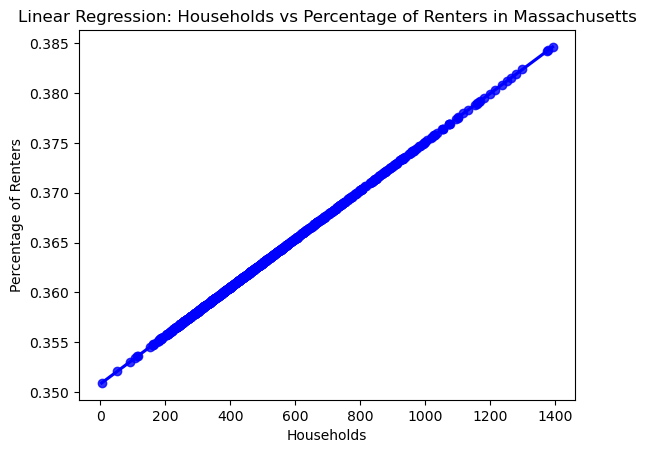

Mean Squared Error: 0.07682199291561706


In [62]:
X = df["households"].values.reshape(-1, 1)
y = df["pct_renters"].values.reshape(-1, 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = model.predict(X_test)

# Plotting the regression line
sns.regplot(x=X_test.flatten(), y=y_pred.flatten(), fit_reg=True, color="blue")
plt.title("Linear Regression: Households vs Percentage of Renters in Massachusetts")
plt.xlabel("Households")
plt.ylabel("Percentage of Renters")
plt.show()

# Calculating and printing Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [63]:
df = pd.read_csv('boston.csv')
df = pd.DataFrame(data = df)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [64]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [76]:
column_name = "CHAS"

# Drop rows where the specified column has zero values
df = df.loc[df[column_name] != 0]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,1,0.8710,5.012,88.0,1.6102,5,403,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,1,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1,0.8710,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
208,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
209,0.43571,0.0,10.59,1,0.4890,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
210,0.17446,0.0,10.59,1,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7


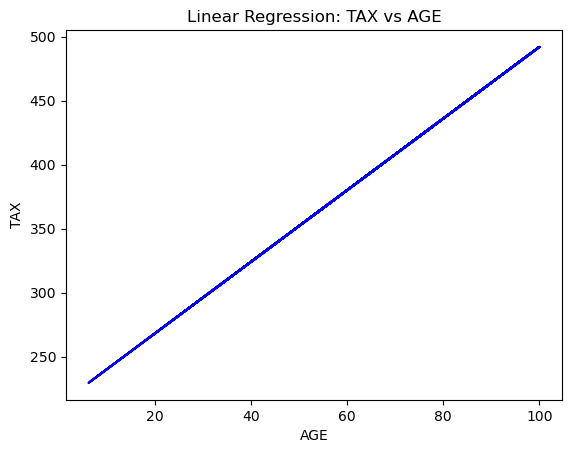

R^2: 0.3577032109277696
Adjusted R^2: 0.3512802430370473
MAE: 121.88237277266035
MSE: 20029.49524394494
RMSE: 141.52559925308546


In [65]:
# Extracting features (X) and target variable (y)
X = df["AGE"].values.reshape(-1, 1)
y = df["TAX"].values.reshape(-1, 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = model.predict(X_test)

# Plotting the regression line
plt.plot(X_test.flatten(), y_pred.flatten(), color="blue")
plt.title("Linear Regression: TAX vs AGE")
plt.xlabel("AGE")
plt.ylabel("TAX")
plt.show()

# Calculating and printing regression performance metrics
print('R^2:', r2_score(y_test, y_pred))
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print('Adjusted R^2:', adj_r2)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

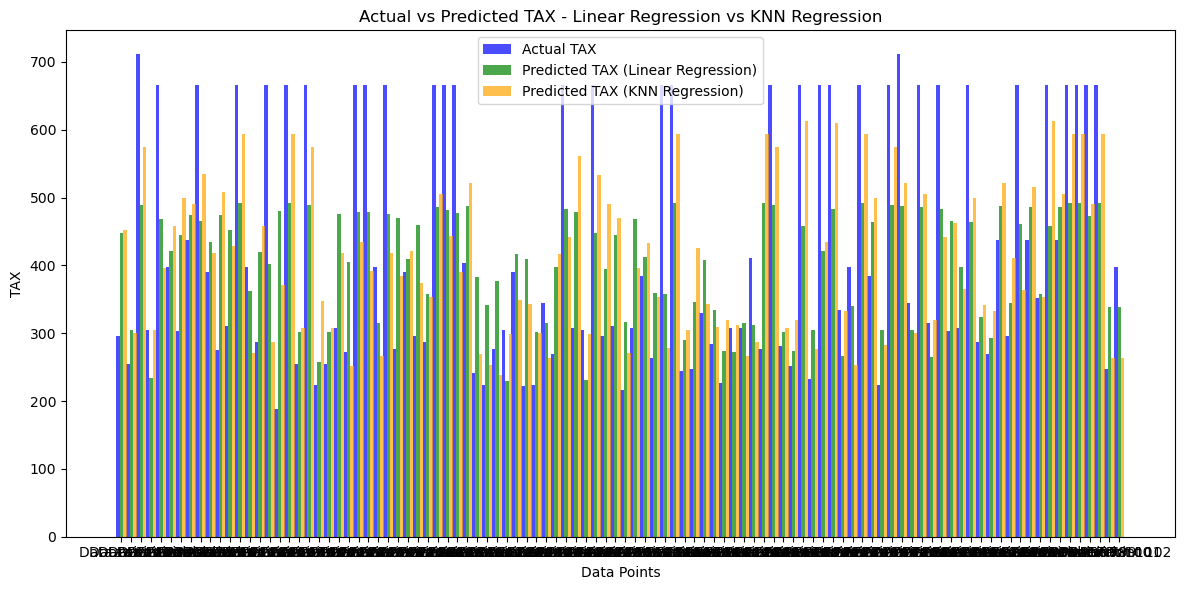

Linear Regression Metrics:
R^2: 0.3577032109277696
Adjusted R^2: 0.3512802430370473
MAE: 121.88237277266035
MSE: 20029.49524394494
RMSE: 141.52559925308546


In [71]:
X = df["AGE"].values.reshape(-1, 1)
y = df["TAX"].values.reshape(-1, 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Creating a KNN regression model (you can adjust the number of neighbors, e.g., n_neighbors=5)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Creating bar plots for actual vs predicted values
bar_width = 0.35
index = np.arange(len(y_test))

plt.figure(figsize=(12, 6))

# Bar plot for linear regression
plt.bar(index, y_test.flatten(), width=bar_width, label='Actual TAX', color='blue', alpha=0.7)
plt.bar(index + bar_width, y_pred_linear.flatten(), width=bar_width, label='Predicted TAX (Linear Regression)', color='green', alpha=0.7)

# Bar plot for KNN regression
plt.bar(index + 2 * bar_width, y_pred_knn.flatten(), width=bar_width, label='Predicted TAX (KNN Regression)', color='orange', alpha=0.7)

plt.xlabel('Data Points')
plt.ylabel('TAX')
plt.title('Actual vs Predicted TAX - Linear Regression vs KNN Regression')
plt.xticks(index + bar_width, [f'Data Point {i+1}' for i in range(len(y_test))])
plt.legend()
plt.tight_layout()
plt.show()

# Print regression performance metrics for linear regression
print("Linear Regression Metrics:")
print('R^2:', r2_score(y_test, y_pred_linear))
adj_r2_linear = 1 - (1 - r2_score(y_test, y_pred_linear)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print('Adjusted R^2:', adj_r2_linear)
print('MAE:', mean_absolute_error(y_test, y_pred_linear))
print('MSE:', mean_squared_error(y_test, y_pred_linear))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_linear)))

# Print regression performance metrics for KNN regression
# print("\nKNN Regression Metrics:")
# print('R^2:', r2_score(y_test, y_pred_knn))
# adj_r2_knn = 1 - (1 - r2_score(y_test, y_pred_knn)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
# print('Adjusted R^2:', adj_r2_knn)
# print('MAE:', mean_absolute_error(y_test, y_pred_knn))
# print('MSE:', mean_squared_error(y_test, y_pred_knn))
# print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_knn)))